In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso

import pysindy as ps
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
from stesml.data_tools import get_scenario_index
from stesml.data_tools import get_train_and_val_index
from stesml.data_tools import load_data

In [31]:
data_dir = "../data/Sulfur_Models/heating/heating_all"

In [32]:
target = 'h'
t_min = 359
t_max = -1

In [33]:
scenario_index = get_scenario_index(data_dir)

In [34]:
train_index, val_index = get_train_and_val_index(scenario_index, random_state=5)

In [46]:
train_data_ = load_data(scenario_index, train_index, t_min=t_min)
train_df = train_data_[['Tw','Ti',target]]
train_df.index = train_data_['flow-time']
train_df

,Tw,Ti,h
flow-time,,,
359.085680,540,400.0,42.231392
359.185680,540,400.0,42.231051
359.285680,540,400.0,42.230711
359.385680,540,400.0,42.230371
359.485680,540,400.0,42.230031
...,...,...,...
7199.604681,460,400.0,25.055965
7199.704681,460,400.0,25.055843
7199.804681,460,400.0,25.055720


In [47]:
val_data_ = load_data(scenario_index, val_index, t_min=t_min)
val_df = val_data_[['Tw','Ti',target]]
val_df.index = val_data_['flow-time']
val_df

,Tw,Ti,h
flow-time,,,
359.066673,560,440.0,42.326066
359.166673,560,440.0,42.326097
359.266673,560,440.0,42.326127
359.366673,560,440.0,42.326156
359.466673,560,440.0,42.326184
...,...,...,...
359.669535,520,440.0,29.671432
359.769535,520,440.0,29.670139
359.869535,520,440.0,29.668846


In [48]:
train_data = list()
train_index = list()
for idx, grp in train_df.groupby(["Tw", "Ti"]):
    train_data.append(grp.values)
    train_index.append(grp.index.values)

In [49]:
val_data = list()
val_index = list()
for idx, grp in val_df.groupby(["Tw", "Ti"]):
    val_data.append(grp.values)
    val_index.append(grp.index.values)

In [50]:
poly_library = ps.feature_library.PolynomialLibrary(degree=6)
optimizer = ps.STLSQ(threshold=0,normalize_columns=True,verbose=True)
model = ps.SINDy(optimizer, feature_names=['Tw','Ti','Ts'], feature_library=poly_library)

In [40]:
model.fit(train_data_list, t=index_list, multiple_trajectories=True)

 Iteration ... |y - Xw|^2 ...  a * |w|_2 ...      |w|_0 ... Total error: |y - Xw|^2 + a * |w|_2
         0 ... 4.1787e+01 ... 1.3768e+00 ...        252 ... 4.3164e+01


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=6),
      feature_names=['Tw', 'Ti', 'Ts'],
      optimizer=STLSQ(normalize_columns=True, threshold=0, verbose=True))

In [41]:
model.print(precision=5)

(Tw)' = 0.00000
(Ti)' = 0.00000
(Ts)' = -1.25054 1 + -0.00132 Tw + 0.00991 Ti + 0.04326 Ts + 0.00001 Tw^2 + -0.00003 Tw Ti + -0.00010 Tw Ts + -0.00001 Ti^2 + -0.00014 Ti Ts + -0.00016 Ts^2 + 0.00002 Ts^3


In [ ]:
n_cases = len(val_data)

In [45]:
predictions = list()
for i in range(n_cases):
    prediction = model.simulate(x0=np.array(val_data[i][0]).reshape(3),t=val_index[i])
    predictions.append(prediction)

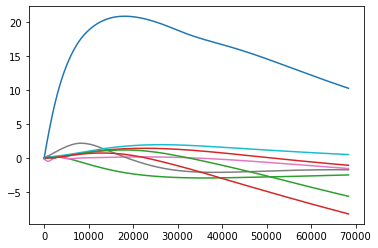

In [43]:
for i in range(n_cases):
    plt.plot(val_data_list[i][:,2] - result[i][:,2])

In [44]:
predictions_joined = list()
val_data_joined = list()

for i in range(n_cases):
    val_data_joined += val_data[i]
    predictions_joined += predictions[i]

In [1006]:
r2 = r2_score(val_data_joined, predictions_joined)
rmse = mean_squared_error(val_data_joined, predictions_joined, squared=False)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 4.842470117290419, R2: 0.8260746935655656


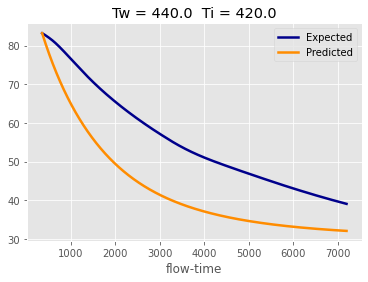

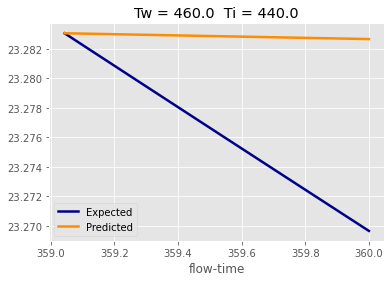

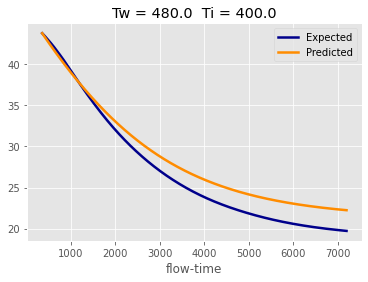

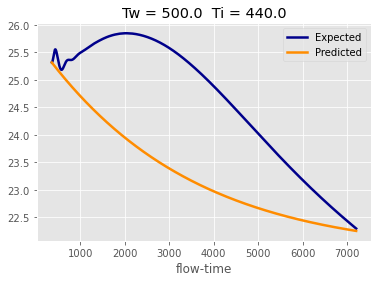

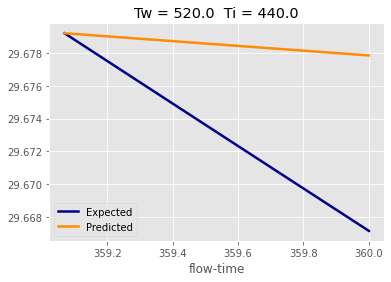

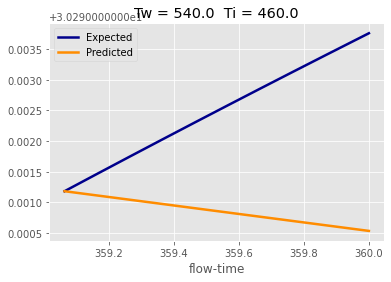

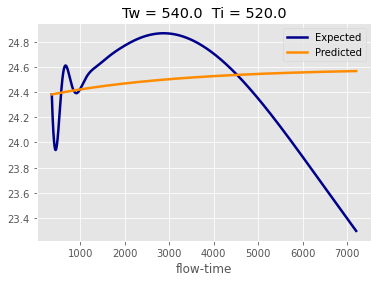

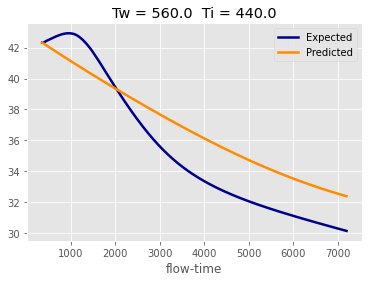

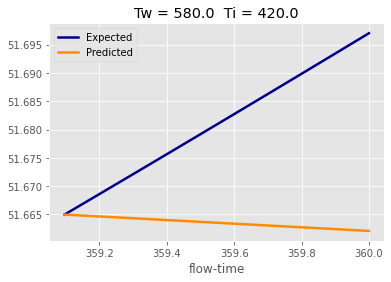

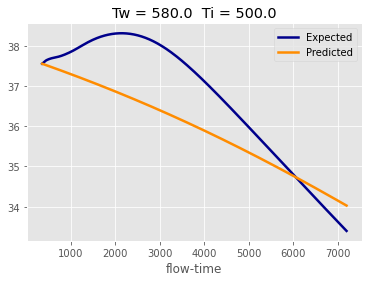

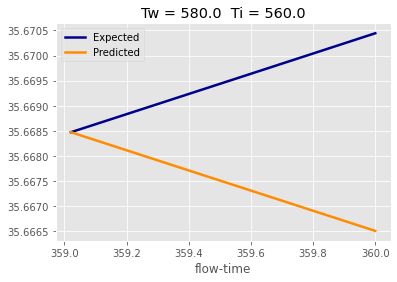

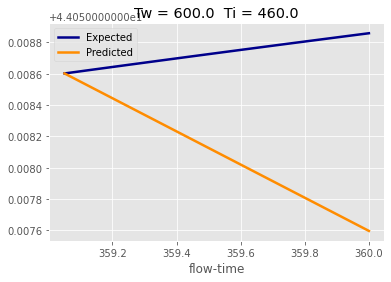

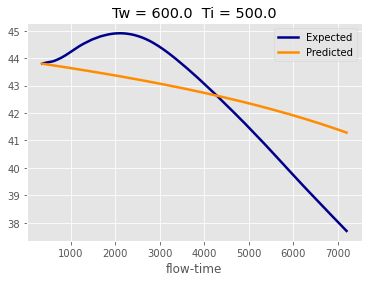

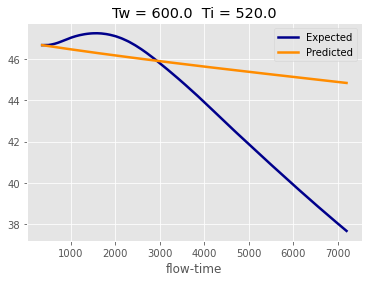

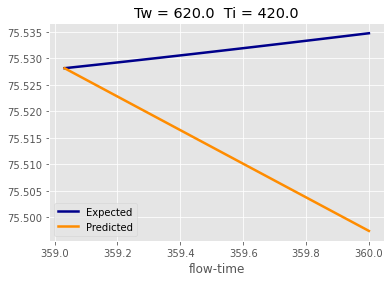

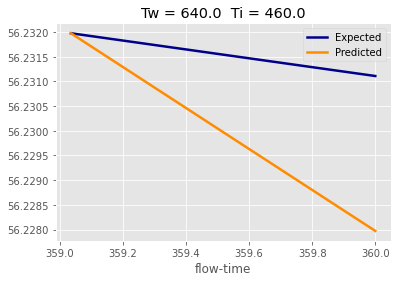

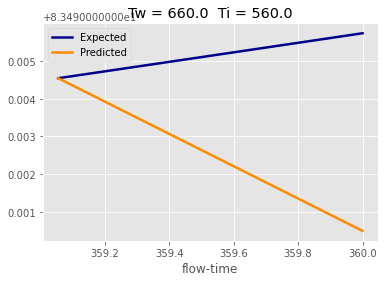

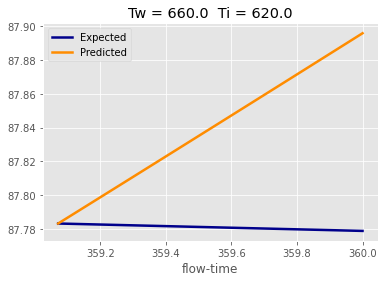

In [1007]:
plt.style.use('ggplot')
for i in range(len(val_data_list)):
    Tw = val_data_list[i][:,0][0]
    Ti = val_data_list[i][:,1][0]
    plt.plot(val_index_list[i], val_data_list[i][:,2], linewidth=2.5, c='DarkBlue', label='Expected')
    plt.plot(val_index_list[i], res_list[i][:,2], linewidth=2.5, c='DarkOrange', label='Predicted')
    plt.xlabel('flow-time')
    plt.title(f'Tw = {Tw}  Ti = {Ti}')
    plt.legend()
    plt.show()